In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from prepare import prep_titanic

1. Logistic Regression
In this exercise, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

OBTAINING THE DATA (Using acquire.py and prepare.py)
In [2]:


In [2]:
train, validate, test = prep_titanic()
train.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,embarked,class,embark_town,alone,is_female,Q,S
583,583,0,1,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0,0
337,337,1,1,41.000000,0,0,134.5000,C,First,Cherbourg,1,1,0,0
50,50,0,3,7.000000,4,1,39.6875,S,Third,Southampton,0,0,0,1
218,218,1,1,32.000000,0,0,76.2917,C,First,Cherbourg,1,1,0,0
31,31,1,1,29.916875,1,0,146.5208,C,First,Cherbourg,0,1,0,0


Q1. Start by defining your baseline model.

In [3]:
train.survived.value_counts(normalize=True)


0    0.617706
1    0.382294
Name: survived, dtype: float64

Q2. Create another model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [4]:
def feature_target_selector(features, target, train=train, validate=validate, test=test):
    X_train = train[features]
    y_train = train[target]
    X_validate = validate[features]
    y_validate = validate[target]
    X_test = test[features]
    y_test = test[target]
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [5]:
features = ['age', 'fare', 'pclass']
target = ['survived']
X_train1, y_train, X_validate1, y_validate, X_test1, y_test = feature_target_selector(features, target)

In [6]:
X_train1.shape


(497, 3)

In [7]:
y_train.shape


(497, 1)

In [8]:
X_train1.head(3)


,age,fare,pclass
583,36.0,40.1250,1
337,41.0,134.5000,1
50,7.0,39.6875,3


In [9]:
y_train.head(3)

,survived
583,0
337,1
50,0


In [10]:
logit1 = LogisticRegression(random_state=123, solver='lbfgs')
logit1.fit(X_train1, y_train)
print('Coefficient: \n', logit1.coef_)
print('Intercept: \n', logit1.intercept_)


Coefficient: 
 [[-0.03051881  0.00266519 -0.97983178]]
Intercept: 
 [2.52970125]


In [11]:
y_pred1 = logit1.predict(X_train1)
y_pred1_proba = logit1.predict_proba(X_train1)

In [12]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train1, y_train)))

print('F1 score of Logistic Regression classifier on training set: {:.2f}'
     .format(f1_score(y_train, y_pred1)))

logit1_score = logit1.score(X_train1, y_train)
logit1_f1 = f1_score(y_train, y_pred1)

Accuracy of Logistic Regression classifier on training set: 0.72
F1 score of Logistic Regression classifier on training set: 0.56


Model 1 performs better than baseline.

In [13]:
print(confusion_matrix(y_train, y_pred1))


[[265  42]
 [ 99  91]]


In [14]:
def print_cm_details(y_pred, y_train=y_train):
    true_positive_count = confusion_matrix(y_train, y_pred)[0][0]
    print(f'True positives: {true_positive_count}')
    false_negative_count = confusion_matrix(y_train, y_pred)[0][1]
    print(f'False negatives: {false_negative_count}')
    false_positive_count = confusion_matrix(y_train, y_pred)[1][0]
    print(f'False positives: {false_positive_count}')
    true_negative_count = confusion_matrix(y_train, y_pred)[1][1]
    print(f'True negatives: {true_negative_count}')

print('Positive is defined as dying (survival = 0)')
print_cm_details(y_pred1)

Positive is defined as dying (survival = 0)
True positives: 265
False negatives: 42
False positives: 99
True negatives: 91


In [15]:
print(classification_report(y_train, y_pred1))


              precision    recall  f1-score   support

           0       0.73      0.86      0.79       307
           1       0.68      0.48      0.56       190

    accuracy                           0.72       497
   macro avg       0.71      0.67      0.68       497
weighted avg       0.71      0.72      0.70       497



Q3. Include sex in your model as well.


In [16]:
features = ['age', 'fare', 'pclass', 'is_female']
target = ['survived']
X_train2, y_train, X_validate2, y_validate, X_test2, y_test = feature_target_selector(features, target)

In [17]:
X_train2.head(3)


,age,fare,pclass,is_female
583,36.0,40.1250,1,0
337,41.0,134.5000,1,1
50,7.0,39.6875,3,0


In [18]:
X_train2.shape


(497, 4)

In [19]:
X_train2.is_female.value_counts()


0    330
1    167
Name: is_female, dtype: int64

In [20]:
logit2 = LogisticRegression(random_state=123, solver='lbfgs')
logit2.fit(X_train2, y_train)
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)

Coefficient: 
 [[-2.66594329e-02  9.02725506e-04 -1.11402250e+00  2.45877991e+00]]
Intercept: 
 [1.84786623]


In [21]:
y_pred2 = logit2.predict(X_train2)
y_pred2_proba = logit2.predict_proba(X_train2)

In [22]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train2, y_train)))

print('F1 score of Logistic Regression classifier on training set: {:.2f}'
     .format(f1_score(y_train, y_pred2)))

logit2_score = logit2.score(X_train2, y_train)
logit2_f1 = f1_score(y_train, y_pred2)

Accuracy of Logistic Regression classifier on training set: 0.80
F1 score of Logistic Regression classifier on training set: 0.73


In [23]:
print(confusion_matrix(y_train, y_pred2))


[[263  44]
 [ 56 134]]


In [24]:
print('Positive is defined as dying (survival = 0)')
print_cm_details(y_pred2)

Positive is defined as dying (survival = 0)
True positives: 263
False negatives: 44
False positives: 56
True negatives: 134


In [25]:
print(classification_report(y_train, y_pred2))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.75      0.71      0.73       190

    accuracy                           0.80       497
   macro avg       0.79      0.78      0.78       497
weighted avg       0.80      0.80      0.80       497



Q4. Try out other combinations of features and models.

In [26]:
train.columns


Index(['passenger_id', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'embark_town', 'alone', 'is_female', 'Q', 'S'],
      dtype='object')

In [27]:
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'is_female', 'Q', 'S']
target = ['survived']
X_train3, y_train, X_validate3, y_validate, X_test3, y_test = feature_target_selector(features, target)

In [28]:
X_train3.head(3)


,pclass,age,sibsp,parch,fare,is_female,Q,S
583,1,36.0,0,0,40.1250,0,0,0
337,1,41.0,0,0,134.5000,1,0,0
50,3,7.0,4,1,39.6875,0,0,1


In [29]:
X_train3.shape


(497, 8)

In [30]:
logit3 = LogisticRegression(random_state=123, solver='lbfgs')
logit3.fit(X_train3, y_train)
print('Coefficient: \n', logit3.coef_)
print('Intercept: \n', logit3.intercept_)


Coefficient: 
 [[-1.11252133e+00 -3.17892054e-02 -3.13222378e-01  2.11418184e-03
   1.94777288e-03  2.56931630e+00  3.77428811e-01  1.76282381e-02]]
Intercept: 
 [2.04275579]


In [31]:
X_train3.columns


Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'is_female', 'Q', 'S'], dtype='object')

In [32]:
y_pred3 = logit3.predict(X_train3)
y_pred3_proba = logit3.predict_proba(X_train3)

In [33]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit3.score(X_train3, y_train)))

print('F1 score of Logistic Regression classifier on training set: {:.2f}'
     .format(f1_score(y_train, y_pred3)))

logit3_score = logit3.score(X_train3, y_train)
logit3_f1 = f1_score(y_train, y_pred3)

Accuracy of Logistic Regression classifier on training set: 0.79
F1 score of Logistic Regression classifier on training set: 0.72


In [34]:
print(confusion_matrix(y_train, y_pred3))


[[258  49]
 [ 56 134]]


In [35]:
print('Positive is defined as dying (survival = 0)')
print_cm_details(y_pred3)

Positive is defined as dying (survival = 0)
True positives: 258
False negatives: 49
False positives: 56
True negatives: 134


In [36]:
print(classification_report(y_train, y_pred3))


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       307
           1       0.73      0.71      0.72       190

    accuracy                           0.79       497
   macro avg       0.78      0.77      0.77       497
weighted avg       0.79      0.79      0.79       497



Gender

In [37]:
features = ['is_female']
target = ['survived']
X_train4, y_train, X_validate4, y_validate, X_test4, y_test = feature_target_selector(features, target)

In [38]:
X_train4.head(3)


,is_female
583,0
337,1
50,0


In [39]:
X_validate4.head()


,is_female
610,1
424,0
568,0
701,0
101,0


In [40]:
X_train4.shape


(497, 1)

In [41]:
logit4 = LogisticRegression(random_state=123, solver='lbfgs')
logit4.fit(X_train4, y_train)
print('Coefficient: \n', logit4.coef_)
print('Intercept: \n', logit4.intercept_)

Coefficient: 
 [[2.37682254]]
Intercept: 
 [-1.36042994]


In [42]:
y_pred4 = logit4.predict(X_train4)
y_pred4_proba = logit4.predict_proba(X_train4)

In [43]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit4.score(X_train4, y_train)))

print('F1 score of Logistic Regression classifier on training set: {:.2f}'
     .format(f1_score(y_train, y_pred4)))

logit4_score = logit4.score(X_train4, y_train)
logit4_f1 = f1_score(y_train, y_pred4)

Accuracy of Logistic Regression classifier on training set: 0.78
F1 score of Logistic Regression classifier on training set: 0.70


In [44]:
print(confusion_matrix(y_train, y_pred4))


[[265  42]
 [ 65 125]]


In [45]:
print('Positive is defined as dying (survival = 0)')
print_cm_details(y_pred4)

Positive is defined as dying (survival = 0)
True positives: 265
False negatives: 42
False positives: 65
True negatives: 125


In [46]:
print(classification_report(y_train, y_pred4))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       307
           1       0.75      0.66      0.70       190

    accuracy                           0.78       497
   macro avg       0.78      0.76      0.77       497
weighted avg       0.78      0.78      0.78       497



Q5. Use your best 3 models to predict and evaluate on your validate sample.

In [47]:
logit_ratings = {'logit_model': ['base', 1, 2, 3, 4], 'accuracy': [0.6177, logit1_score, logit2_score, logit3_score, logit4_score], 'f1_score': [np.nan, logit1_f1, logit2_f1, logit3_f1, logit4_f1]}
logit_models = pd.DataFrame(data=logit_ratings)
logit_models

,logit_model,accuracy,f1_score
0,base,0.617700,NaN
1,1,0.716298,0.563467
2,2,0.798793,0.728261
3,3,0.788732,0.718499
4,4,0.784708,0.700280


In [48]:
# Logit Models 2, 3, and 4 have the highest accuracy and highest f1 scores

y_pred2 = logit2.predict(X_validate2)
y_pred3 = logit3.predict(X_validate3)
y_pred4 = logit4.predict(X_validate4)

In [49]:
print("Model 2: Logistic Regression - Validate Performance")

print('Accuracy: {:.2f}'.format(logit2.score(X_validate2, y_validate)))

print(confusion_matrix(y_validate, y_pred2))

print(classification_report(y_validate, y_pred2))

print("Model 3: Logistic Regression - Validate Performance")

print('Accuracy: {:.2f}'.format(logit3.score(X_validate3, y_validate)))

print(confusion_matrix(y_validate, y_pred3))

print(classification_report(y_validate, y_pred3))

print("Model 4: Logistic Regression - Validate Performance")

print('Accuracy: {:.2f}'.format(logit4.score(X_validate4, y_validate)))

print(confusion_matrix(y_validate, y_pred4))

print(classification_report(y_validate, y_pred4))

Model 2: Logistic Regression - Validate Performance
Accuracy: 0.79
[[111  21]
 [ 25  57]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       132
           1       0.73      0.70      0.71        82

    accuracy                           0.79       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.79      0.78       214

Model 3: Logistic Regression - Validate Performance
Accuracy: 0.77
[[110  22]
 [ 28  54]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       132
           1       0.71      0.66      0.68        82

    accuracy                           0.77       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.76      0.77      0.76       214

Model 4: Logistic Regression - Validate Performance
Accuracy: 0.77
[[109  23]
 [ 27  55]]
              precision    recall  f1-score   support

           0       0.

Q6. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [50]:
print("Model 2: Logistic Regression - Test Performance")

print('Accuracy: {:.2f}'.format(logit2.score(X_test2, y_test)))

y_pred2 = logit2.predict(X_test2)

print(confusion_matrix(y_test, y_pred2))

print(classification_report(y_test, y_pred2))


Model 2: Logistic Regression - Test Performance
Accuracy: 0.82
[[93 17]
 [15 53]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       110
           1       0.76      0.78      0.77        68

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



In [51]:
print("Model 2: Logistic Regression - Validate Performance")

print('Accuracy: {:.2f}'.format(logit2.score(X_validate2, y_validate)))

y_pred2 = logit2.predict(X_validate2)

print(confusion_matrix(y_validate, y_pred2))

print(classification_report(y_validate, y_pred2))

Model 2: Logistic Regression - Validate Performance
Accuracy: 0.79
[[111  21]
 [ 25  57]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       132
           1       0.73      0.70      0.71        82

    accuracy                           0.79       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.79      0.78       214



In [52]:
print("Model 2: Logistic Regression - Train Performance")

print('Accuracy: {:.2f}'.format(logit2.score(X_train2, y_train)))

y_pred2 = logit2.predict(X_train2)

print(confusion_matrix(y_train, y_pred2))

print(classification_report(y_train, y_pred2))

Model 2: Logistic Regression - Train Performance
Accuracy: 0.80
[[263  44]
 [ 56 134]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.75      0.71      0.73       190

    accuracy                           0.80       497
   macro avg       0.79      0.78      0.78       497
weighted avg       0.80      0.80      0.80       497



In [53]:
# Conclusion: Our Logistic Regression Model 2 has an 82% accuracy on test data.
# Performance on Validate and Train data is similar at 79% and 80% respectively.
# Overfitting not likely. High confidence in model's ability to perform on new data.

2. Decision Trees

In this exercise, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

Q1. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [54]:
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'is_female', 'Q', 'S']
target = ['survived']
X_train5, y_train, X_validate5, y_validate, X_test5, y_test = feature_target_selector(features, target)

[0.7847082494969819, 0.7907444668008048, 0.8189134808853119, 0.8350100603621731, 0.8571428571428571, 0.8611670020120724, 0.8752515090543259, 0.8933601609657947, 0.9134808853118712, 0.937625754527163, 0.9577464788732394, 0.959758551307847, 0.9758551307847082, 0.9778672032193159, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9879275653923542, 0.9879275653923542, 0.9879275653923542]
The optimal max_depth is 18
The accuracy on the train data at this depth is 0.988


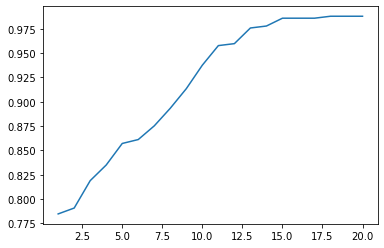

In [55]:
scores = []
for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
    tree.fit(X_train5, y_train)
    scores.append(tree.score(X_train5, y_train))
print(scores)

max_train_accuracy = max(scores)
max_train_index = scores.index(max_train_accuracy)
optimal_train_depth = max_train_index + 1
print(f'The optimal max_depth is {optimal_train_depth}')
print(f'The accuracy on the train data at this depth is {round(max_train_accuracy, 3)}')

plt.plot(range(1,21), scores)
plt.show()

In [56]:
tree5 = DecisionTreeClassifier(random_state = 1, max_depth = optimal_train_depth)
tree5.fit(X_train5, y_train)
y_pred5 = tree.predict(X_train5)
y_pred5[0:5]

array([0, 1, 0, 1, 1])

In [57]:
y_pred5_proba = tree.predict_proba(X_train5)
y_pred5_proba[0:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

Q2. Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [58]:
print('Accuracy of Decision Tree classifier #5 on training set: {:.3f}'
     .format(tree5.score(X_train5, y_train)))

Accuracy of Decision Tree classifier #5 on training set: 0.988


In [59]:
confusion_matrix(y_train, y_pred5)


array([[307,   0],
       [  6, 184]])

In [60]:
print(classification_report(y_train, y_pred5))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       307
           1       1.00      0.97      0.98       190

    accuracy                           0.99       497
   macro avg       0.99      0.98      0.99       497
weighted avg       0.99      0.99      0.99       497



Q3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [61]:
print(classification_report(y_train, y_pred5))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       307
           1       1.00      0.97      0.98       190

    accuracy                           0.99       497
   macro avg       0.99      0.98      0.99       497
weighted avg       0.99      0.99      0.99       497



In [62]:
print('Positive is defined as dying (survival = 0)')
print_cm_details(y_pred5)

Positive is defined as dying (survival = 0)
True positives: 307
False negatives: 0
False positives: 6
True negatives: 184


In [63]:
tree5_score = tree5.score(X_train5, y_train)
tree5_f1 = f1_score(y_train, y_pred5)

print('Accuracy of Decision Tree classifier #5 on training set: {:.3f}'
     .format(tree5.score(X_train5, y_train)))

print('F1 score of Decision Tree classifier #5 on training set: {:.3f}'
     .format(f1_score(y_train, y_pred5)))


Accuracy of Decision Tree classifier #5 on training set: 0.988
F1 score of Decision Tree classifier #5 on training set: 0.984


Q5. Run through steps 2-4 using a different max_depth value.

In [64]:
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'is_female', 'Q', 'S']
target = ['survived']
X_train6, y_train, X_validate6, y_validate, X_test6, y_test = feature_target_selector(features, target)

tree6 = DecisionTreeClassifier(random_state = 1, max_depth = 5)
tree6.fit(X_train6, y_train)

y_pred6 = tree6.predict(X_train6)
y_pred6_proba = tree6.predict_proba(X_train6)

tree6_score = tree6.score(X_train6, y_train)
tree6_f1 = f1_score(y_train, y_pred6)

print('Accuracy of Decision Tree classifier #6 on training set: {:.3f}'
     .format(tree6.score(X_train6, y_train)))
print('F1 score of Decision Tree classifier #6 on training set: {:.3f}'
     .format(f1_score(y_train, y_pred6)))

Accuracy of Decision Tree classifier #6 on training set: 0.857
F1 score of Decision Tree classifier #6 on training set: 0.799


In [65]:
confusion_matrix(y_train, y_pred6)


array([[285,  22],
       [ 49, 141]])

In [66]:
print(classification_report(y_train, y_pred6))


              precision    recall  f1-score   support

           0       0.85      0.93      0.89       307
           1       0.87      0.74      0.80       190

    accuracy                           0.86       497
   macro avg       0.86      0.84      0.84       497
weighted avg       0.86      0.86      0.85       497



In [67]:
print('Positive is defined as dying (survival = 0)')
print_cm_details(y_pred6)

Positive is defined as dying (survival = 0)
True positives: 285
False negatives: 22
False positives: 49
True negatives: 141


Q6. Which model performs better on your in-sample data?

In [68]:
print('Accuracy of Decision Tree classifier #5 on training set: {:.3f}'
     .format(tree5.score(X_train5, y_train)))
print('Accuracy of Decision Tree classifier #6 on training set: {:.3f}'
     .format(tree6.score(X_train6, y_train)))

Accuracy of Decision Tree classifier #5 on training set: 0.988
Accuracy of Decision Tree classifier #6 on training set: 0.857


Q7. Which model performs best on your out-of-sample data, the validate set?

In [69]:
print("Model 5: Decision Tree - Validate Performance")

print('Accuracy: {:.3f}'.format(tree5.score(X_validate5, y_validate)))

y_pred5 = tree5.predict(X_validate5)

print(confusion_matrix(y_validate, y_pred5))

print(classification_report(y_validate, y_pred5))

Model 5: Decision Tree - Validate Performance
Accuracy: 0.794
[[110  22]
 [ 22  60]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       132
           1       0.73      0.73      0.73        82

    accuracy                           0.79       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



In [70]:
print("Model 6: Decision Tree - Validate Performance")

print('Accuracy: {:.3f}'.format(tree6.score(X_validate6, y_validate)))

y_pred6 = tree6.predict(X_validate6)

print(confusion_matrix(y_validate, y_pred6))

print(classification_report(y_validate, y_pred6))

Model 6: Decision Tree - Validate Performance
Accuracy: 0.790
[[115  17]
 [ 28  54]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       132
           1       0.76      0.66      0.71        82

    accuracy                           0.79       214
   macro avg       0.78      0.76      0.77       214
weighted avg       0.79      0.79      0.79       214



Model 5 performs slightly better on the validate set than Model 6


3. Random Forest


Q1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 20.


In [71]:
features = ['age', 'fare', 'pclass', 'is_female']
target = ['survived']
X_train7, y_train, X_validate7, y_validate, X_test7, y_test = feature_target_selector(features, target)

In [72]:
rf7 = RandomForestClassifier(random_state = 123, min_samples_leaf = 1, max_depth = 20)
rf7.fit(X_train7, y_train)
print(rf7.feature_importances_)
print(X_train7.columns)

[0.2666368  0.36145071 0.10885156 0.26306093]
Index(['age', 'fare', 'pclass', 'is_female'], dtype='object')


In [73]:
y_pred7 = rf7.predict(X_train7)
print(y_pred7[0:5])


[0 1 0 1 1]


In [74]:
y_pred7_proba = rf7.predict_proba(X_train7)
print(y_pred7_proba[0:5])

[[0.87 0.13]
 [0.   1.  ]
 [0.97 0.03]
 [0.01 0.99]
 [0.   1.  ]]


Q2. Evaluate your results using the model score, confusion matrix, and classification report.

In [75]:
print('Accuracy of random forest classifier #7 on training set: {:.3f}'
     .format(rf7.score(X_train7, y_train)))

Accuracy of random forest classifier #7 on training set: 0.988


In [76]:
print(confusion_matrix(y_train, y_pred7))


[[305   2]
 [  4 186]]


In [77]:
print(classification_report(y_train, y_pred7))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       307
           1       0.99      0.98      0.98       190

    accuracy                           0.99       497
   macro avg       0.99      0.99      0.99       497
weighted avg       0.99      0.99      0.99       497



Q3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [78]:
print('Positive is defined as dying (survival = 0)')
print_cm_details(y_pred7)

Positive is defined as dying (survival = 0)
True positives: 305
False negatives: 2
False positives: 4
True negatives: 186


In [79]:
print('Accuracy of Random Forest classifier #7 on training set: {:.3f}'
     .format(rf7.score(X_train7, y_train)))
print('F1 score of Random Forest classifier #7 on training set: {:.3f}'
     .format(f1_score(y_train, y_pred7)))


Accuracy of Random Forest classifier #7 on training set: 0.988
F1 score of Random Forest classifier #7 on training set: 0.984


Q4. Run through steps increasing your min_samples_leaf to 5 and decreasing your max_depth to 3.

In [80]:
features = ['age', 'fare', 'pclass', 'is_female']
target = ['survived']
X_train8, y_train, X_validate8, y_validate, X_test8, y_test = feature_target_selector(features, target)

In [81]:
rf8 = RandomForestClassifier(random_state = 123, min_samples_leaf = 5, max_depth = 3)
rf8.fit(X_train8, y_train)
print(rf8.feature_importances_)
print(X_train8.columns)

[0.06189287 0.17500253 0.19138647 0.57171813]
Index(['age', 'fare', 'pclass', 'is_female'], dtype='object')


In [82]:
y_pred8 = rf8.predict(X_train8)
print(y_pred8[0:5])

[0 1 0 1 1]


In [83]:
y_pred8_proba = rf8.predict_proba(X_train8)
print(y_pred8_proba[0:5])

[[0.60729844 0.39270156]
 [0.05726486 0.94273514]
 [0.70789031 0.29210969]
 [0.06025362 0.93974638]
 [0.06002711 0.93997289]]


In [84]:
print('Accuracy of random forest classifier #8 on training set: {:.3f}'
     .format(rf8.score(X_train8, y_train)))

Accuracy of random forest classifier #8 on training set: 0.821


In [85]:
print(confusion_matrix(y_train, y_pred8))


[[291  16]
 [ 73 117]]


In [86]:
print(classification_report(y_train, y_pred8))


              precision    recall  f1-score   support

           0       0.80      0.95      0.87       307
           1       0.88      0.62      0.72       190

    accuracy                           0.82       497
   macro avg       0.84      0.78      0.80       497
weighted avg       0.83      0.82      0.81       497



Q5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [87]:
print("Model 7: Random Forest - Train Performance - Min Samples Leaf = 1, Max Depth = 20")

print('Accuracy: {:.3f}'.format(rf7.score(X_train7, y_train)))

y_pred7 = rf7.predict(X_train7)

print(confusion_matrix(y_train, y_pred7))

print(classification_report(y_train, y_pred7))

Model 7: Random Forest - Train Performance - Min Samples Leaf = 1, Max Depth = 20
Accuracy: 0.988
[[305   2]
 [  4 186]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       307
           1       0.99      0.98      0.98       190

    accuracy                           0.99       497
   macro avg       0.99      0.99      0.99       497
weighted avg       0.99      0.99      0.99       497



In [88]:
print("Model 8: Random Forest - Train Performance - Min Samples Leaf = 5, Max Depth = 3")

print('Accuracy: {:.3f}'.format(rf8.score(X_train8, y_train)))

y_pred8 = rf8.predict(X_train8)

print(confusion_matrix(y_train, y_pred8))

print(classification_report(y_train, y_pred8))

Model 8: Random Forest - Train Performance - Min Samples Leaf = 5, Max Depth = 3
Accuracy: 0.821
[[291  16]
 [ 73 117]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       307
           1       0.88      0.62      0.72       190

    accuracy                           0.82       497
   macro avg       0.84      0.78      0.80       497
weighted avg       0.83      0.82      0.81       497



Model 7 performs better on the train data because the increased depth and reduced min samples size for leaves allows for significantly more decision nodes within each tree generated. This results in a tighter fit of the model to the data, but may also risk overfitting.

Q6. Which one has the best performance (or closest metrics) on both train and validate?

In [89]:
print("Model 7: Random Forest - Validate Performance - Min Samples Leaf = 1, Max Depth = 20")

print('Accuracy: {:.3f}'.format(rf7.score(X_validate7, y_validate)))

y_pred7 = rf7.predict(X_validate7)

print(confusion_matrix(y_validate, y_pred7))

print(classification_report(y_validate, y_pred7))

Model 7: Random Forest - Validate Performance - Min Samples Leaf = 1, Max Depth = 20
Accuracy: 0.813
[[113  19]
 [ 21  61]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       132
           1       0.76      0.74      0.75        82

    accuracy                           0.81       214
   macro avg       0.80      0.80      0.80       214
weighted avg       0.81      0.81      0.81       214



In [90]:
print("Model 8: Random Forest - Validate Performance - Min Samples Leaf = 5, Max Depth = 3")

print('Accuracy: {:.3f}'.format(rf8.score(X_validate8, y_validate)))

y_pred8 = rf8.predict(X_validate8)

print(confusion_matrix(y_validate, y_pred8))

print(classification_report(y_validate, y_pred8))

Model 8: Random Forest - Validate Performance - Min Samples Leaf = 5, Max Depth = 3
Accuracy: 0.785
[[121  11]
 [ 35  47]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       132
           1       0.81      0.57      0.67        82

    accuracy                           0.79       214
   macro avg       0.79      0.74      0.76       214
weighted avg       0.79      0.79      0.78       214



Model 7 still outperforms models 2 on the validate set, though performance drops substantially between train and validate. Model 8 performance drops only slightly between train and validate.

4. K-Nearest Neighbors (KNN)



Q1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [91]:
features = ['age', 'fare', 'pclass', 'is_female']
target = ['survived']
X_train9, y_train, X_validate9, y_validate, X_test9, y_test = feature_target_selector(features, target)

In [92]:
knn9 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn9.fit(X_train9, y_train)
y_pred9 = knn9.predict(X_train9)
y_pred9_proba = knn9.predict_proba(X_train9)

Q2. Evaluate your results using the model score, confusion matrix, and classification report.


In [93]:
print('Accuracy of KNN classifier #9 on training set: {:.3f}'
     .format(knn9.score(X_train9, y_train)))

Accuracy of KNN classifier #9 on training set: 0.779


In [94]:
print(confusion_matrix(y_train, y_pred9))


[[260  47]
 [ 63 127]]


In [95]:
print(classification_report(y_train, y_pred9))


              precision    recall  f1-score   support

           0       0.80      0.85      0.83       307
           1       0.73      0.67      0.70       190

    accuracy                           0.78       497
   macro avg       0.77      0.76      0.76       497
weighted avg       0.78      0.78      0.78       497



Q3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [96]:
print('Positive is defined as dying (survival = 0)')
print_cm_details(y_pred9)

Positive is defined as dying (survival = 0)
True positives: 260
False negatives: 47
False positives: 63
True negatives: 127


In [97]:
print('Accuracy of KNN classifier #9 on training set: {:.3f}'
     .format(rf7.score(X_train9, y_train)))
print('F1 score of KNN classifier #9 on training set: {:.3f}'
     .format(f1_score(y_train, y_pred9)))

Accuracy of KNN classifier #9 on training set: 0.988
F1 score of KNN classifier #9 on training set: 0.698


Q4. Run through steps 2-4 setting k to 10


In [98]:
features = ['age', 'fare', 'pclass', 'is_female']
target = ['survived']
X_train10, y_train, X_validate10, y_validate, X_test10, y_test = feature_target_selector(features, target)

In [99]:
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn10.fit(X_train10, y_train)
y_pred10 = knn10.predict(X_train10)
y_pred10_proba = knn10.predict_proba(X_train10)

In [100]:
print('Accuracy of KNN classifier #10 on training set: {:.3f}'
     .format(knn10.score(X_train10, y_train)))

Accuracy of KNN classifier #10 on training set: 0.757


In [101]:
print(confusion_matrix(y_train, y_pred10))


[[278  29]
 [ 92  98]]


In [102]:
print(classification_report(y_train, y_pred10))


              precision    recall  f1-score   support

           0       0.75      0.91      0.82       307
           1       0.77      0.52      0.62       190

    accuracy                           0.76       497
   macro avg       0.76      0.71      0.72       497
weighted avg       0.76      0.76      0.74       497



In [103]:
print('Positive is defined as dying (survival = 0)')
print_cm_details(y_pred10)

Positive is defined as dying (survival = 0)
True positives: 278
False negatives: 29
False positives: 92
True negatives: 98


In [104]:
print('F1 score of KNN classifier #10 on training set: {:.3f}'
     .format(f1_score(y_train, y_pred10)))


F1 score of KNN classifier #10 on training set: 0.618


Q5. Run through steps 2-4 setting k to 20


In [105]:
features = ['age', 'fare', 'pclass', 'is_female']
target = ['survived']
X_train11, y_train, X_validate11, y_validate, X_test11, y_test = feature_target_selector(features, target)

In [106]:
knn11 = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn11.fit(X_train11, y_train)
y_pred11 = knn11.predict(X_train11)
y_pred11_proba = knn11.predict_proba(X_train11)

In [107]:
print('Accuracy of KNN classifier #11 on training set: {:.3f}'
     .format(knn11.score(X_train11, y_train)))

Accuracy of KNN classifier #11 on training set: 0.718


In [108]:
print(confusion_matrix(y_train, y_pred11))


[[281  26]
 [114  76]]


In [109]:
print(classification_report(y_train, y_pred11))


              precision    recall  f1-score   support

           0       0.71      0.92      0.80       307
           1       0.75      0.40      0.52       190

    accuracy                           0.72       497
   macro avg       0.73      0.66      0.66       497
weighted avg       0.72      0.72      0.69       497



In [110]:
print('Positive is defined as dying (survival = 0)')
print_cm_details(y_pred11)

Positive is defined as dying (survival = 0)
True positives: 281
False negatives: 26
False positives: 114
True negatives: 76


In [111]:
print('F1 score of KNN classifier #11 on training set: {:.3f}'
     .format(f1_score(y_pred11, y_train)))

F1 score of KNN classifier #11 on training set: 0.521


Q6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [112]:
print("KNN (k = 5)")
print(classification_report(y_train, y_pred9))
print("KNN (k = 10)")
print(classification_report(y_train, y_pred10))
print("KNN (k = 20)")
print(classification_report(y_train, y_pred11))

KNN (k = 5)
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       307
           1       0.73      0.67      0.70       190

    accuracy                           0.78       497
   macro avg       0.77      0.76      0.76       497
weighted avg       0.78      0.78      0.78       497

KNN (k = 10)
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       307
           1       0.77      0.52      0.62       190

    accuracy                           0.76       497
   macro avg       0.76      0.71      0.72       497
weighted avg       0.76      0.76      0.74       497

KNN (k = 20)
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       307
           1       0.75      0.40      0.52       190

    accuracy                           0.72       497
   macro avg       0.73      0.66      0.66       497
weighted avg       0.72      0.72   

In [113]:
# As k increases, performance in both accuracy and f1 score on the training data set decrease
# This is likely do to overfitting when k is small
# When k is small, the model will rely more heavily on small variations in the training data set
# While this will improve train performance, it will likely result in a model that is overfit and performs worse on out-of-sample data

Q7. Which model performs best on our out-of-sample data from validate?

In [ ]:
print("Model 9: KNN - Validate Performance - k = 5")

print('Accuracy: {:.3f}'.format(knn9.score(X_validate9, y_validate)))

y_pred9 = knn9.predict(X_validate9)

print(confusion_matrix(y_validate, y_pred9))

print(classification_report(y_validate, y_pred9))


In [ ]:
print("Model 10: KNN - Validate Performance - k = 10")

print('Accuracy: {:.3f}'.format(knn10.score(X_validate10, y_validate)))

y_pred10 = knn10.predict(X_validate10)

print(confusion_matrix(y_validate, y_pred10))

print(classification_report(y_validate, y_pred10))

In [ ]:
print("Model 11: KNN - Validate Performance - k = 20")

print('Accuracy: {:.3f}'.format(knn11.score(X_validate11, y_validate)))

y_pred11 = knn11.predict(X_validate11)

print(confusion_matrix(y_validate, y_pred11))

print(classification_report(y_validate, y_pred11))


In [ ]:
# Of the three samples, Model 9 has the highest accuracy, and model 11 has the highest f1-score
# Model 10 has both the lowest accuracy and the lowest f1 score
# Because model 11's accuracy is only slightly lower than model 9, recommendation would be to use model 11 on test set